# Red Wine Quality Prediction

### Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
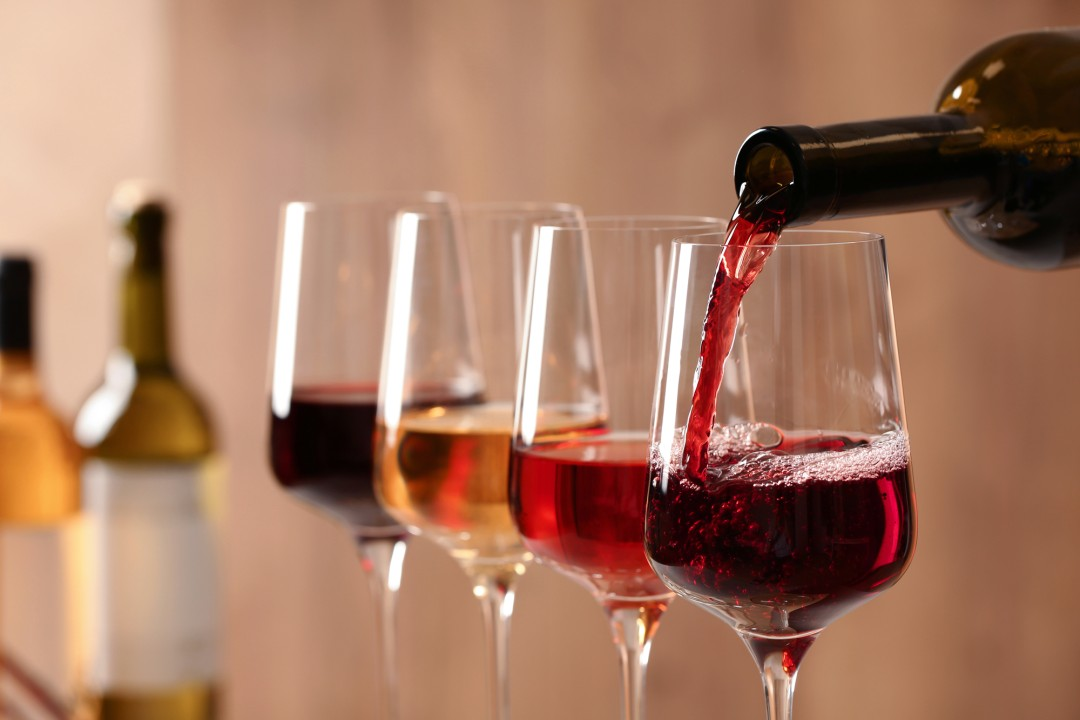

### Attribute Information:

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine.

### Importing required libraries
Pandas is a useful library in data handling.
Numpy library used for working with arrays.
Seaborn/Matplotlib are used for data visualisation purpose.
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.


In [173]:
import sklearn
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold                                            
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


print(colored('\nAll libraries imported succesfully.', 'green'))



All libraries imported succesfully.


### Session 1. For the purpose of prediction!
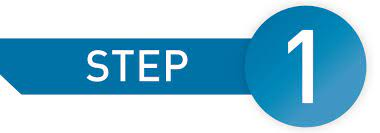
1. Data importing and processing


In [117]:
df = pd.read_csv('winequality.csv') 
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Attribute Information:

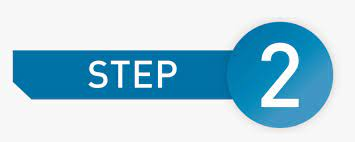


### Data Preparation and Cleaning

#### Data Information

In [118]:
#Lets check the data types of each column present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Information about the data type of columns of data

In [119]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Missing Values

In [120]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: There is no missing values present in our dataset.

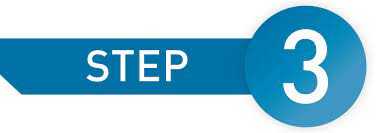

# Exploratory Analysis and Visualization (EDA)

Exploratory Data Analysis
EDA is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.



In [121]:
df.isnull().sum().sum()

0

This is to check it there any null values present in given dataset. all variables showint  0 means no blank entry in the dataset.

Distribution Graphs (Histogram, barplot):

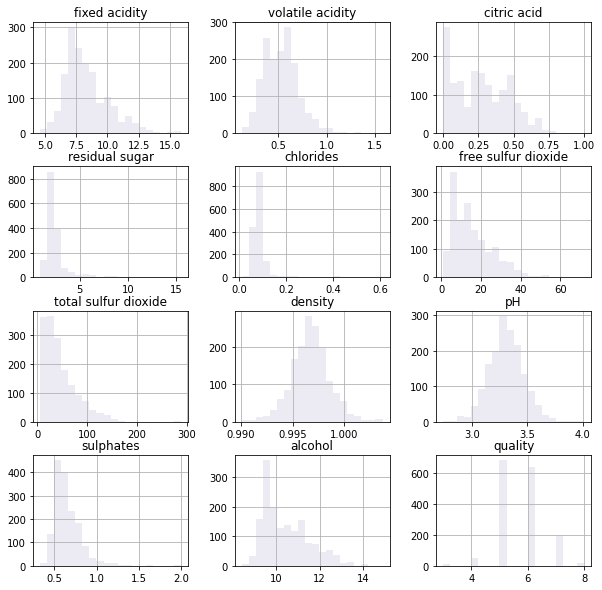

In [122]:
df.hist(bins=20,figsize=(10,10))
plt.show()

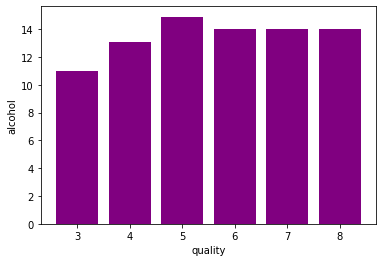

In [123]:
plt.bar(df['quality'],df['alcohol'],color='purple')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [124]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [125]:
#Rename columns to better recall them.
df.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
       'chlorides':'chlorides', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide', 'density':'density',
       'pH':'pH', 'sulphates':'sulphates', 'alcohol':'alcohol', 'quality':'quality'})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [126]:
#Create a list of DataFrame columns
columns = list(df.columns)

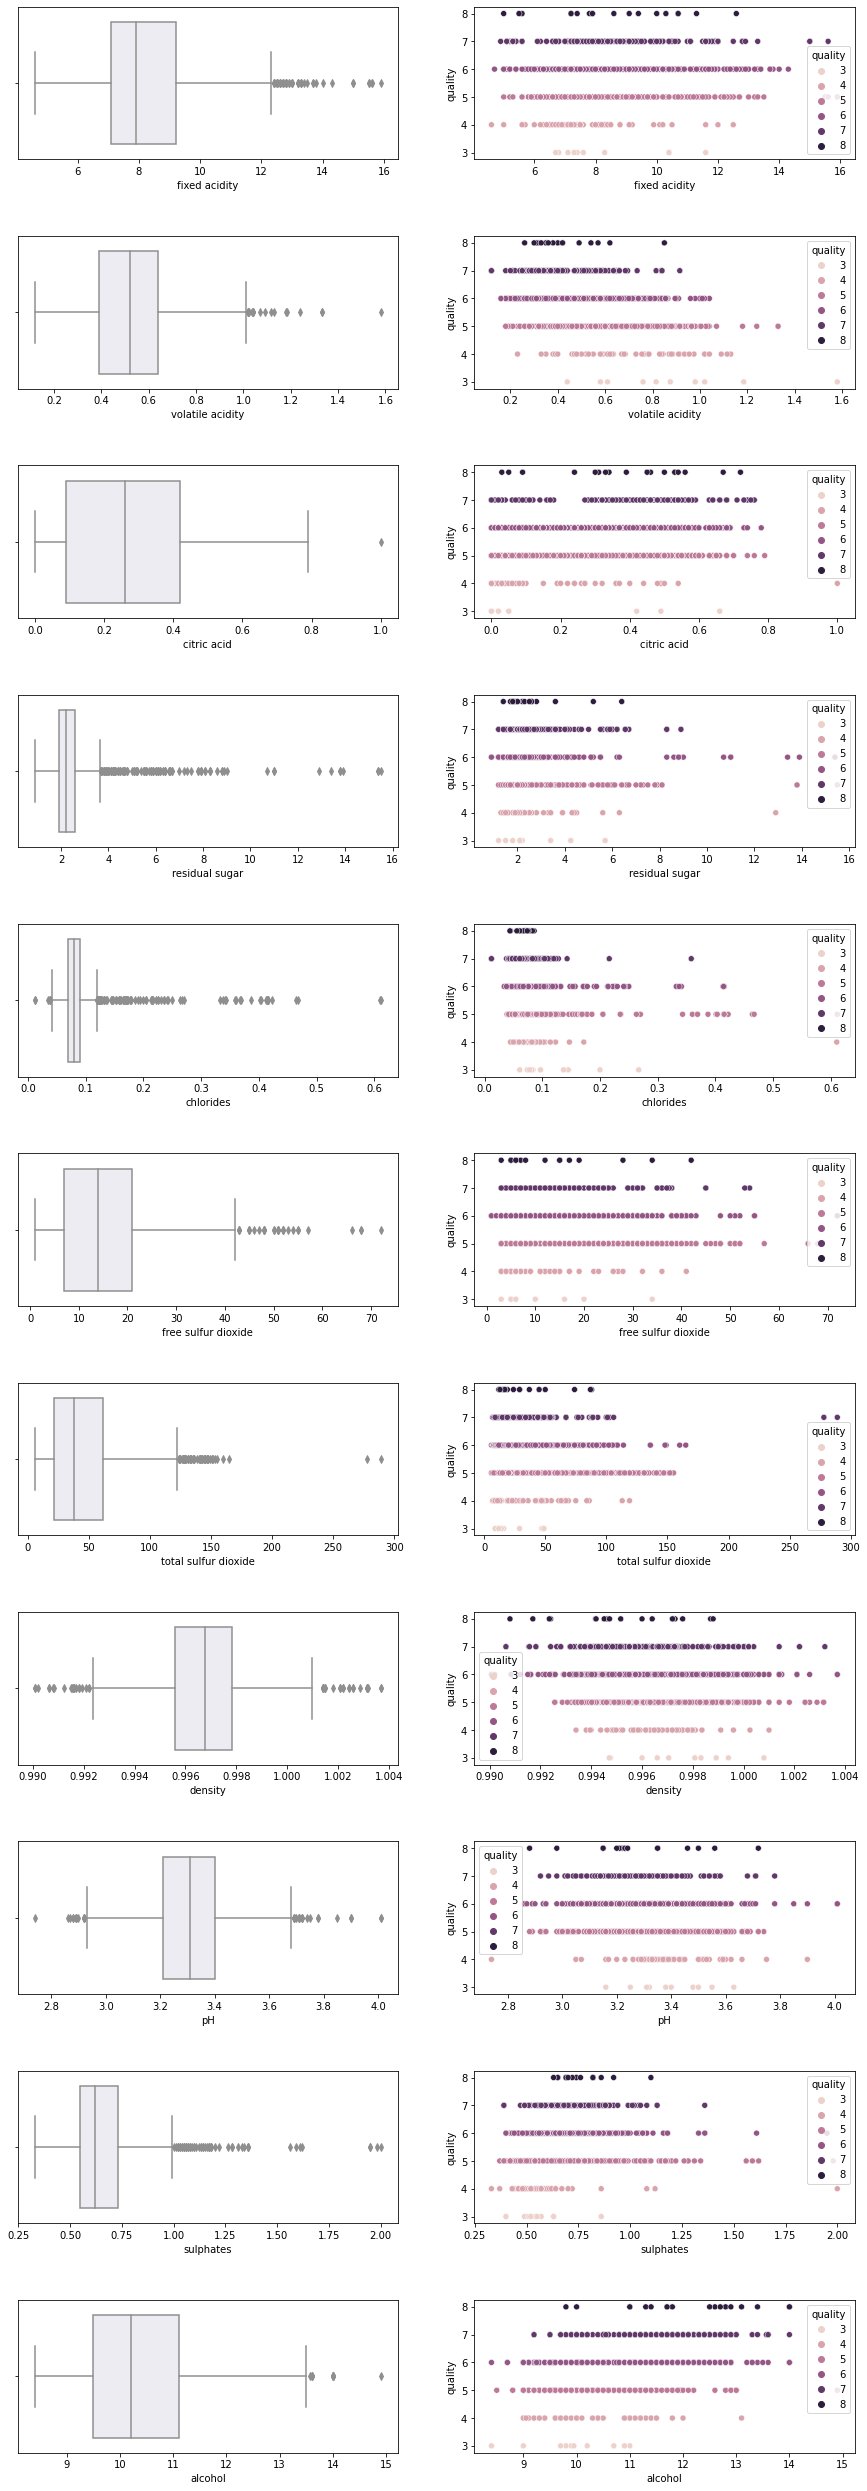

In [127]:
fig,ax = plt.subplots(11,2,figsize=(15,45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11):
    #AX1
    sns.boxplot(x=columns[i], data= df, ax=ax[i, 0])
    #Ax2
    sns.scatterplot(x=columns[i], y='quality',data=df,hue='quality',ax=ax[i,1])

Observation: There is no Outlier in data.

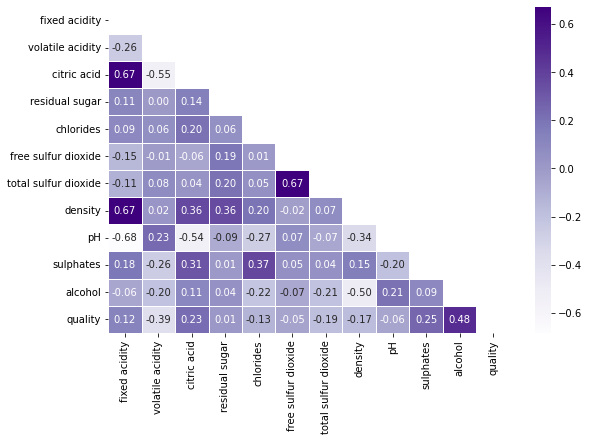

In [128]:
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True, fmt = '.2f',linewidth=0.5,cmap='Purples',mask = np.triu(corr))
plt.show()

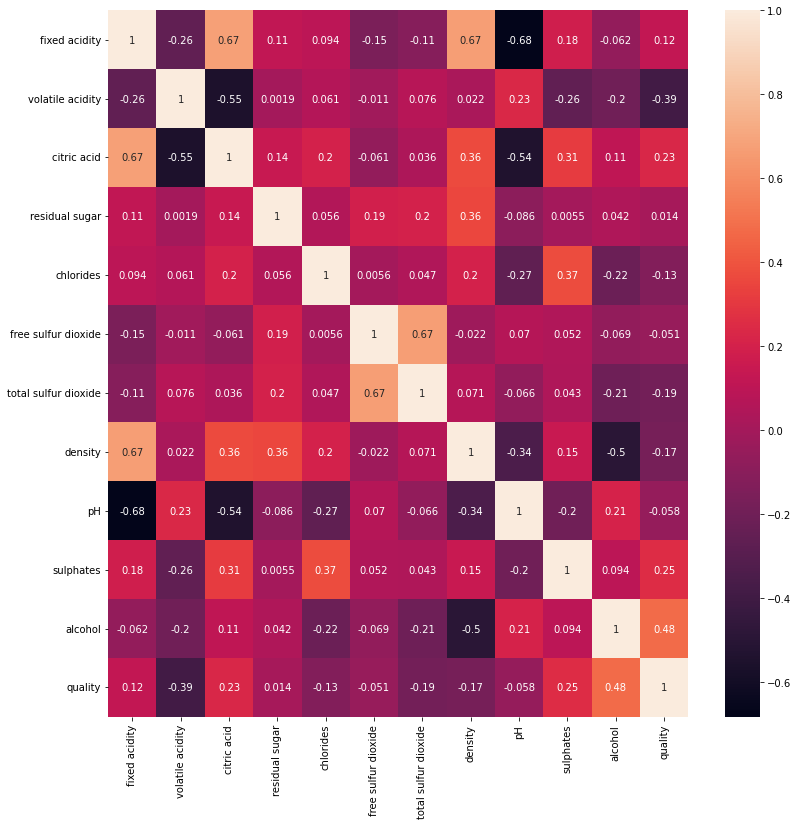

In [129]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

If you think that why we have to discard those correlated, because relationship among them is equal they equally impact on model accuracy so, we delete one of them.

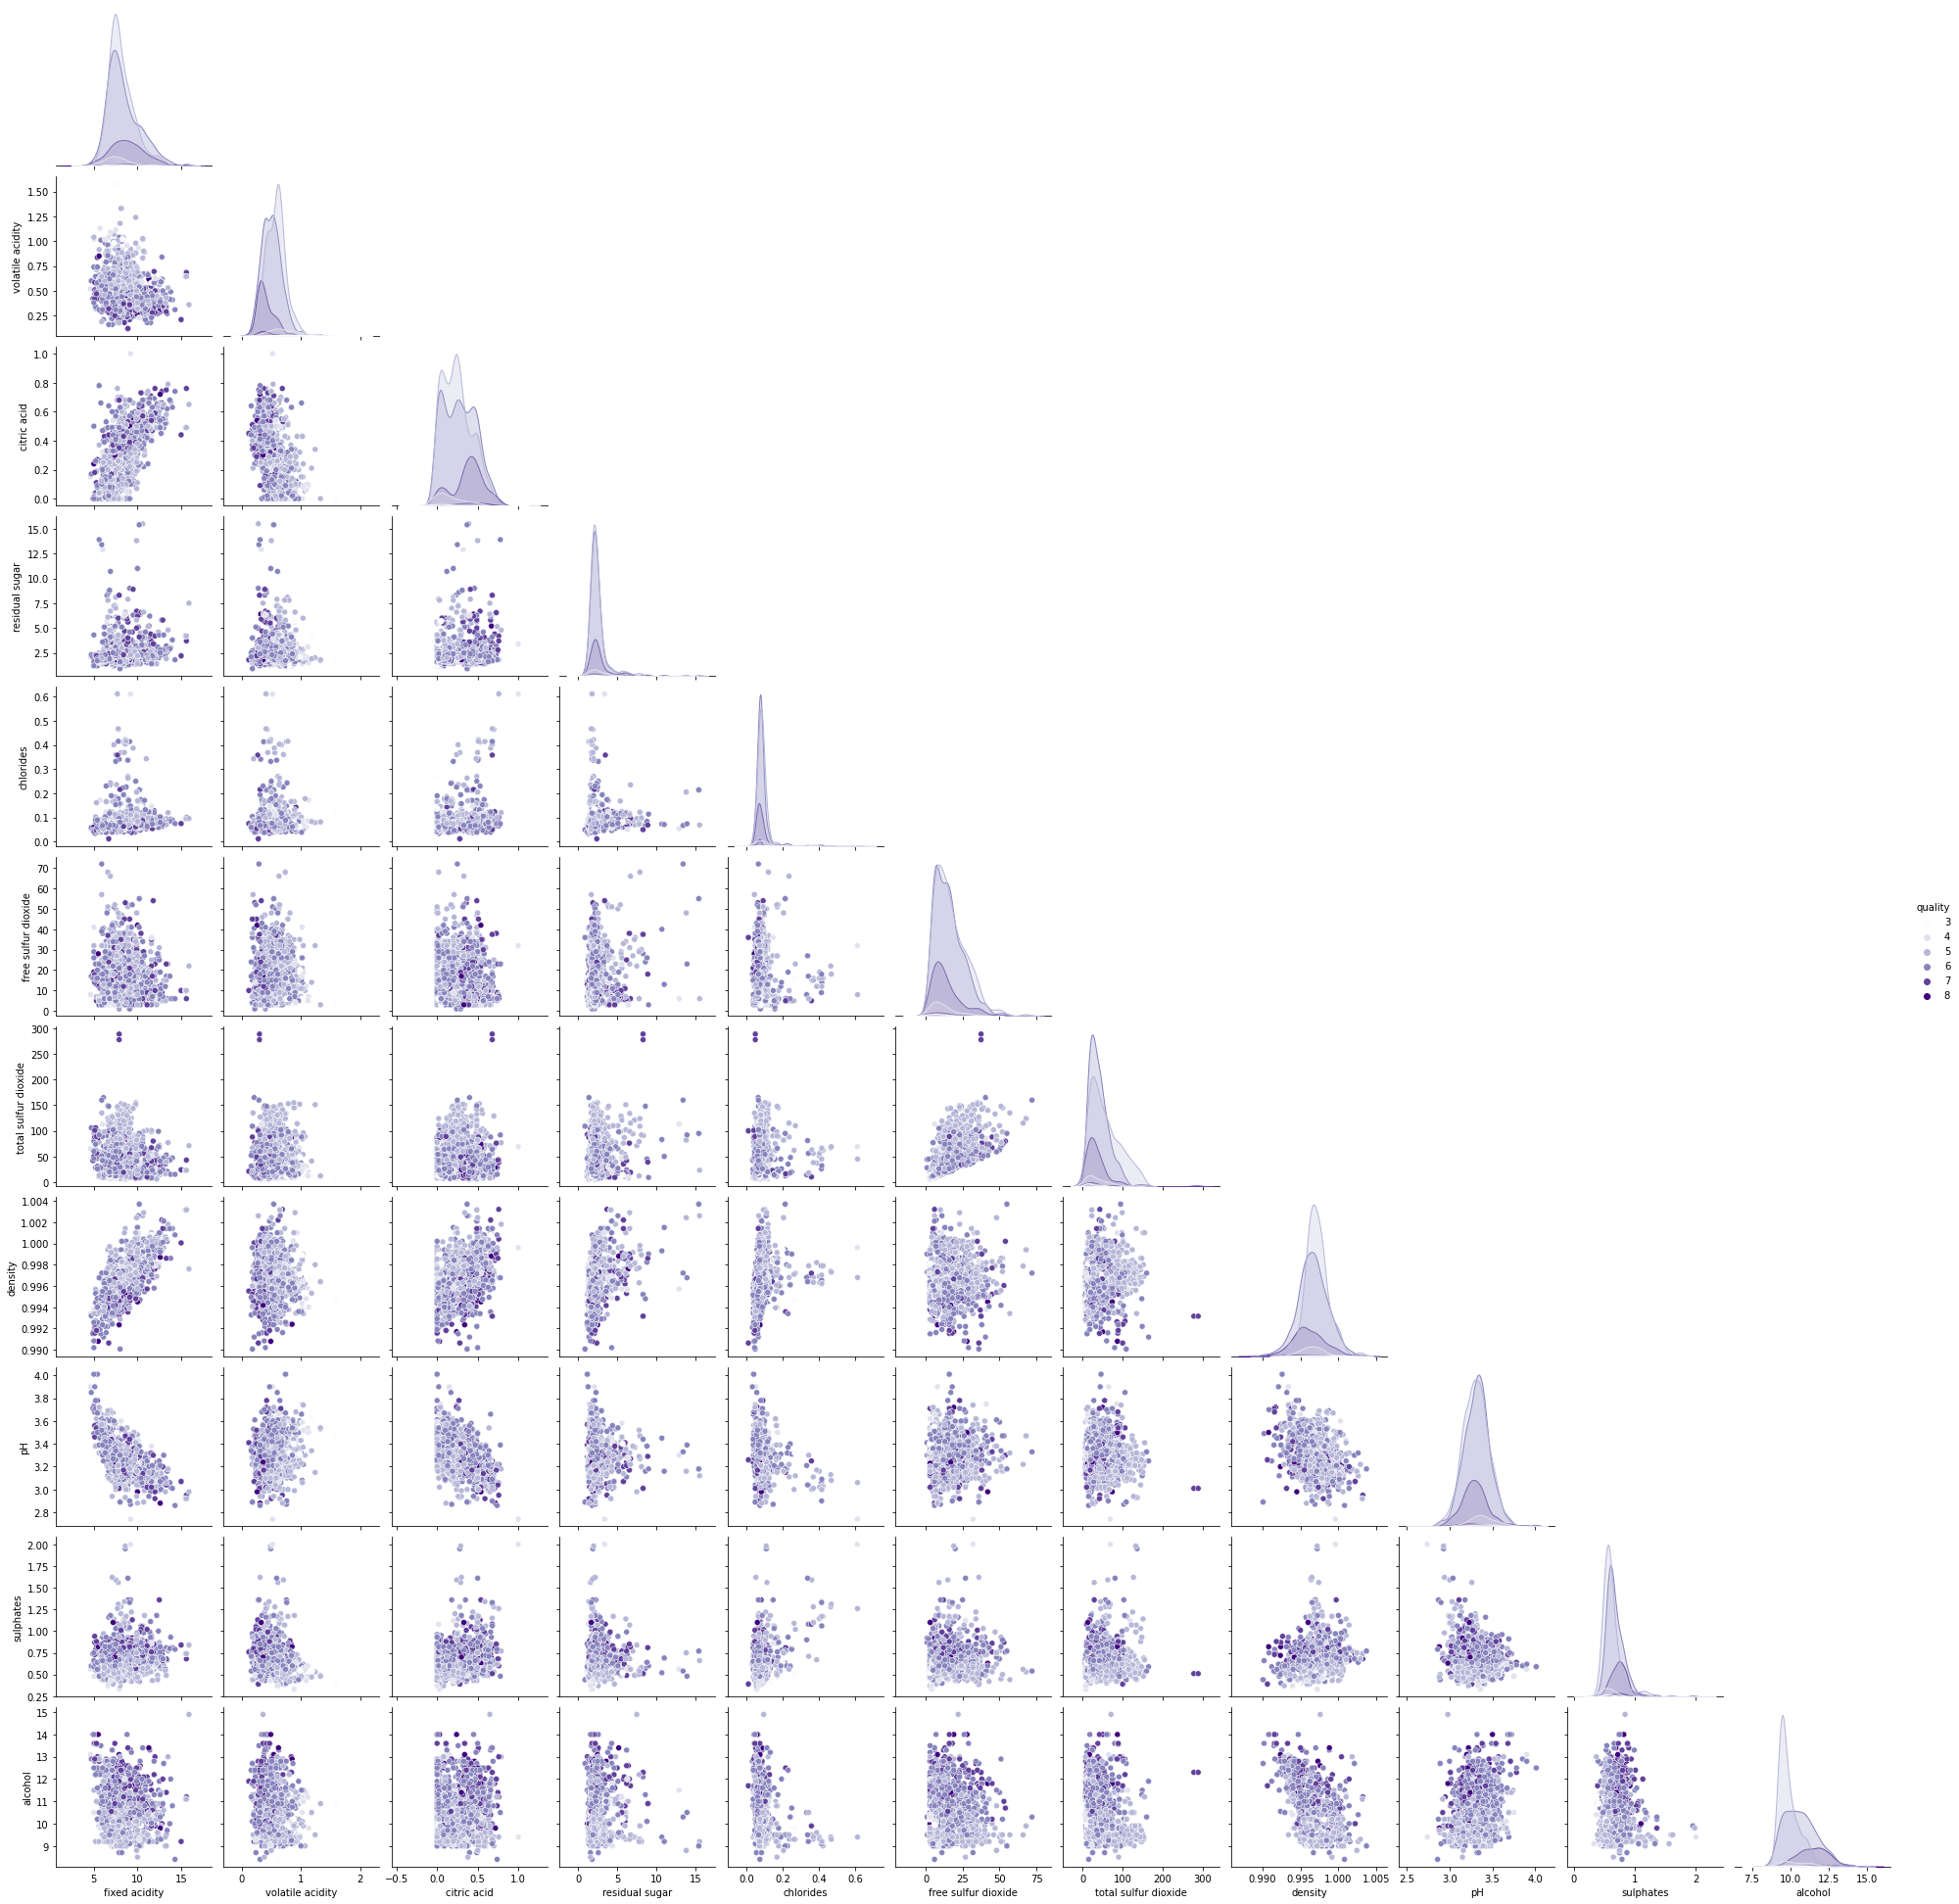

In [130]:
sns.pairplot(df,hue='quality',corner=True,palette='Purples')

#### Plots Analysis

##### Best Correlation are between:
    citric acid - fixed acidity----->0.67
    density - fixed acidity    ----->0.67
    total_sulfor_dioxide & free_sulfor_dioxide----->0.67

#### Target categorizing 

In [131]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Replace quality name as    Good  and middle, Bad

In [132]:
df = df.replace({'quality':{
                                8:'Good',
                                7:'Good',
                                6:'Middle',
                                5:'Middle',
                                4:'Bad',
                                3:'Bad'
                             }
                    }
                   )

In [133]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


#### Normalization:

In [134]:
#Create X from dataframe and y as Target
X_temp = df.drop(columns='quality')
y = df.quality

Normalize X data to decrease effect of large number.
Here, Using MinMaxScaler and ranged in [0,1]

In [135]:
scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns= X_temp.columns)
X.describe().T.style.background_gradient(axis=0,cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free sulfur dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total sulfur dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


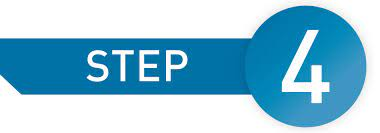

### Initialization

In [136]:
#define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plottting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='',cmap="Purples")
    ax.set_xlabel('Predicted labels',fontsize = 18)
    ax.set_ylabel('True labels',fontsize = 18)
    ax.set_title('confusion Matrix', fontsize =25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    plt.show()

In [137]:
#Define a function to ploting classification report
def clfr_plot(y_test, y_pred):
    '''Plotting Classification report'''
    cr = pd.Dataframe(metrics.classification_report(y_test, y_pred_rf, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace= True)
    sns.heatmap(cr, cmp="Purples", annot = True, linecolor='white',linewidth=0.5).xaxis.tick_top
() 

()

In [138]:
def clf_plot(y_pred) :
    '''1) Plotting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    #Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels',fontsize=18)
    ax[0].set_title("Confusion Matix", fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    
    #Right AX :Classification Report
    ax[1] = sns.heatmap(cr, cmap="Purples", annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classifiaction Report', fontsize=25)
    plt.show()

In [139]:
df.quality.value_counts()

Middle    1319
Good       217
Bad         63
Name: quality, dtype: int64

### Splitting dataset
Now we perform a split operation on our dataset:

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Applying Model
This is the last step where we apply any suitable model which will give more accuracy, here we will use RandomForestClassifier because it was the only ML model that gives the 88% accuracy which was considered as the best accuracy.


### RandomForestClassifier :

In [141]:
#a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt','log2']
}

rf = RandomForestClassifier(n_jobs = -1)
rf_cv = GridSearchCV(estimator = rf, cv=20, param_grid = parameters).fit(X_train, y_train)

print('Tuned hyper parameters :', rf_cv.best_params_)
print('accuracy : ',rf_cv.best_score_)

Tuned hyper parameters : {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
accuracy :  0.8707203389830509


C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Atharv\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 273, in _wrap_func_call
    return func()
  File "C:\Users\Atharv\anaconda3\lib\site-packages\joblib\parallel.py", line 589, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Atharv\anaconda3\lib\site-packages\joblib\parallel.py", line 589, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\Atharv\

In [142]:
# Model:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train,y_train)

In [143]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score: ',rf_score)

RandomForestClassifier score:  0.88


In [144]:
y_test.value_counts()

Middle    339
Good       45
Bad        16
Name: quality, dtype: int64

C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


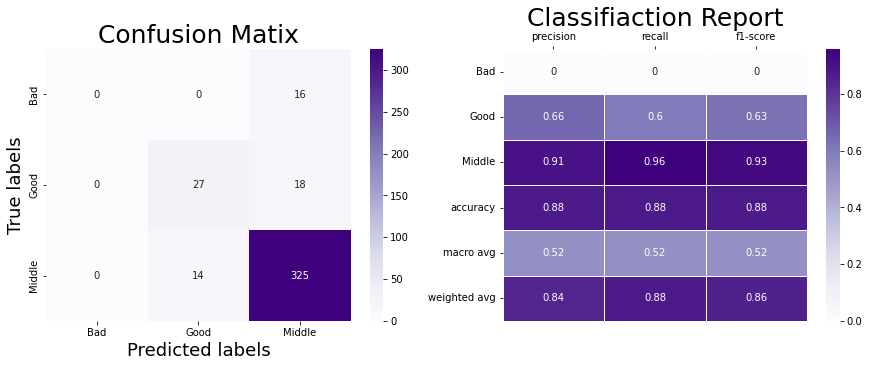

In [145]:
clf_plot(y_pred_rf)

### Logistic Regression:

In [146]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid = parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ',lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.82484593837535


Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.82484593837535

In [147]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [148]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression Score: ',lr_score)

LogisticRegression Score:  0.85


C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


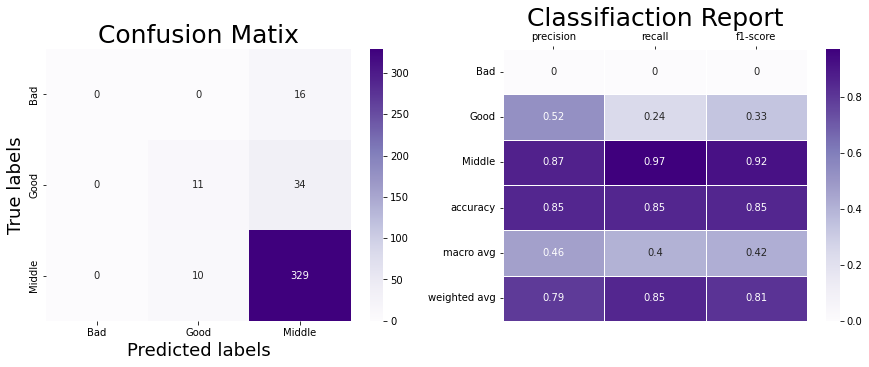

In [149]:
clf_plot(y_pred_lr)

### SVC

In [150]:
# a dictionary to define parameters to test in algorithms
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}
svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid = parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters: ',svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters:  {'C': 10, 'gamma': 100}
accuracy :  0.8532212885154061


In [151]:
#Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [152]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test,y_test),3)
print('SVC Score : ', svc_score)

SVC Score :  0.888


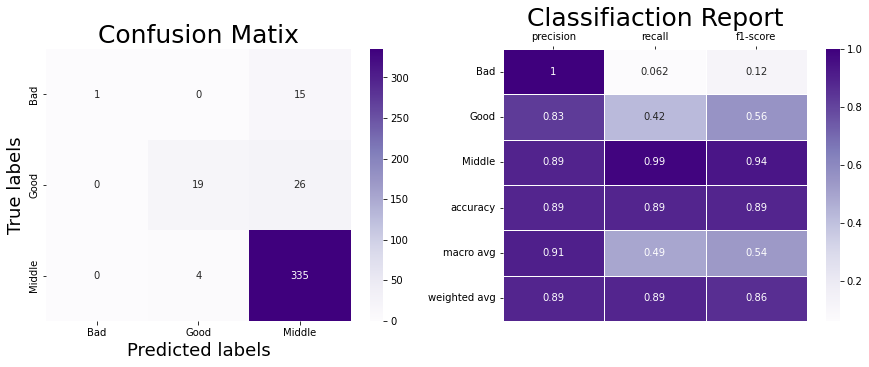

In [153]:
clf_plot(y_pred_svc)

In [154]:
#a dictionary to define paramters to test in algorihtms
parameters = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
    }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator = tree, cv =10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ',tree_cv.best_params_)
print('accuracy : ',tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
accuracy :  0.8315546218487395


C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
520 fits failed out of a total of 1560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_f

In [155]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [156]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score: ',tree_score)

DecisionTreeClassifier Score:  0.83


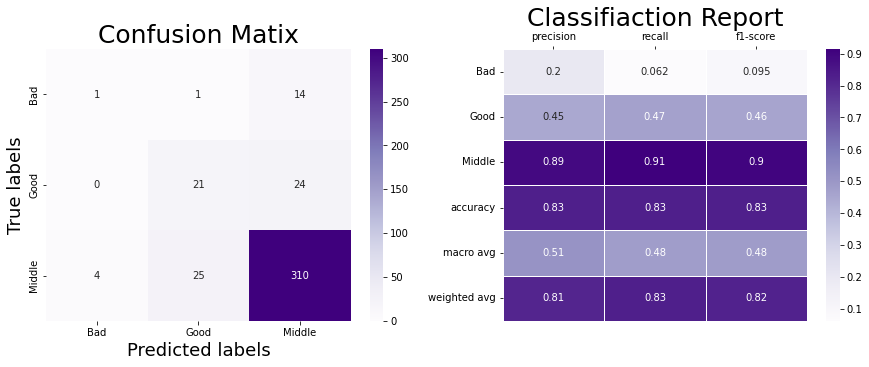

In [157]:
clf_plot(y_pred_tree)

### KNeighborsClassifier

In [158]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3 , 50, 2)),
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3,4]
    
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, cv=10, param_grid = parameters).fit(X_train, y_train)

print('Tuned hyper parameters: ',knn_cv.best_params_)
print('accuracy: ',knn_cv.best_score_)

Tuned hyper parameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
accuracy:  0.8615616246498599


In [159]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [160]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score: ', knn_score)

KNeighborsClassifier Score:  0.855


C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atharv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


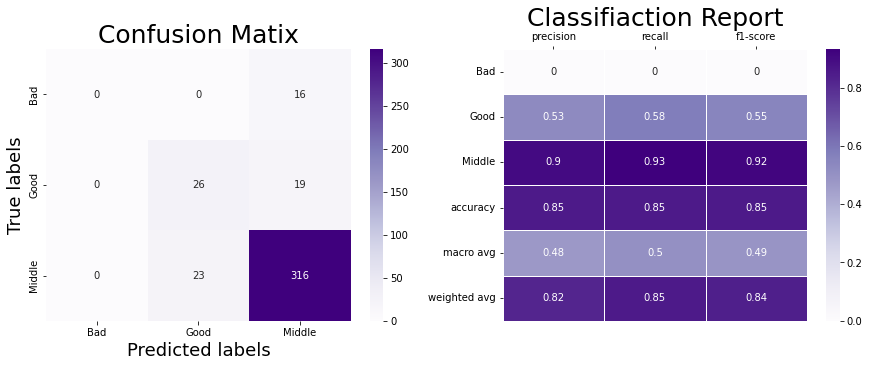

In [161]:
clf_plot(y_pred_knn)

### GaussianNB

In [162]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score: ', gnb_score)

GNB Score:  0.762


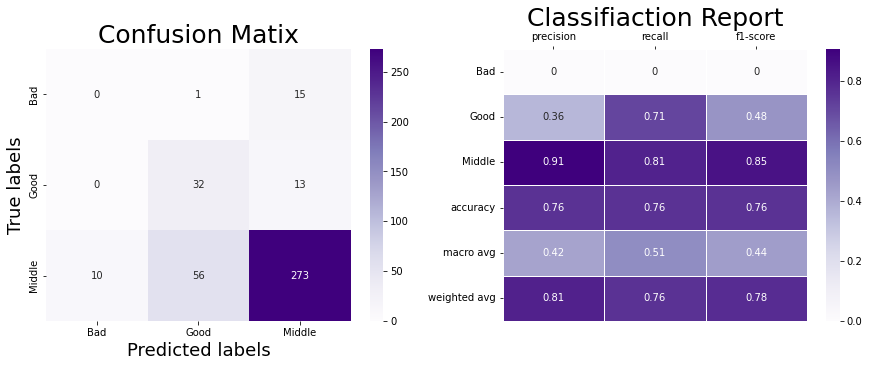

In [163]:
clf_plot(y_pred_gnb)

In [164]:
result = pd.DataFrame({'Algorithm' : ['RandomForestClassifier','LogisticRegression', 'SVC','DecisionTreeClassifier', 'KneighborsClassifier','GaussianNB'],
                      'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
                      })
result.sort_values(by='Score', inplace =True)

In [165]:
sns.set_palette("Purples")

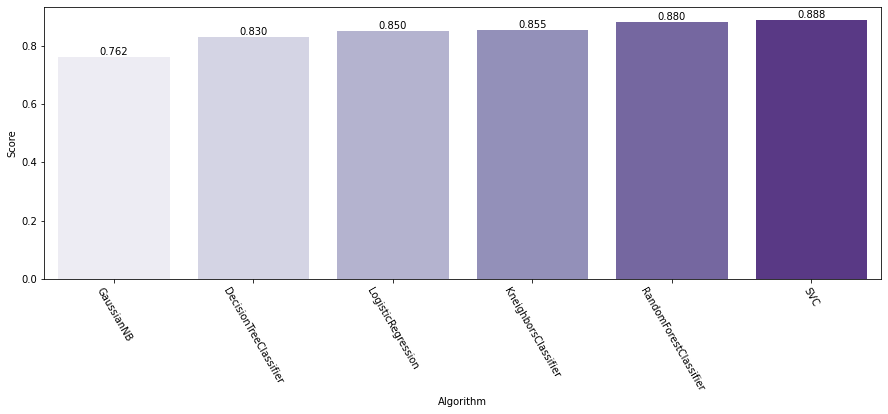

In [166]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm,rotation=300)
plt.show()

Observation: According to the above plots,best algorithms base on Score is:
        SVC
        So, we choose SVC

# Saving Model
At last, we save our machine learning model:

In [167]:
svc = SVC(**svc_cv.best_params_)

In [168]:
svc.fit(X,y)

SVC(C=10, gamma=100)

In [170]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(svc,open(file,'wb'))

So, at this step, our machine learning prediction is over.